# 第 8 章 使用 SVM 完成乳腺癌检测

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

## 载入数据（有 40 个特征）

In [31]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X = cancer.data
y = cancer.target

print('data shape: {0}; no. positive: {1}; no. negative: {2}'.format(X.shape, y[y==1].shape[0], y[y==0].shape[0]))

data shape: (569, 30); no. positive: 357; no. negative: 212


In [32]:
X.shape, y.shape

((569, 30), (569,))

## 分割训练数据集和测试数据集

In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=666)

## 高斯核函数

数据集很少，使用 rbf 这么复杂的容易造成过拟合。

In [36]:
from sklearn.svm import SVC

clf = SVC(C=1.0, kernel='rbf', gamma=0.1)
clf.fit(X_train, y_train)
train_score = clf.score(X_train, y_train)
test_score = clf.score(X_test, y_test)
print('train score: {0}; test score: {1}'.format(train_score, test_score))

train score: 1.0; test score: 0.5877192982456141


画学习曲线的时候，为什么要交叉验证

best param: {'gamma': 0.00011379310344827585}
best score: 0.9367311072056239


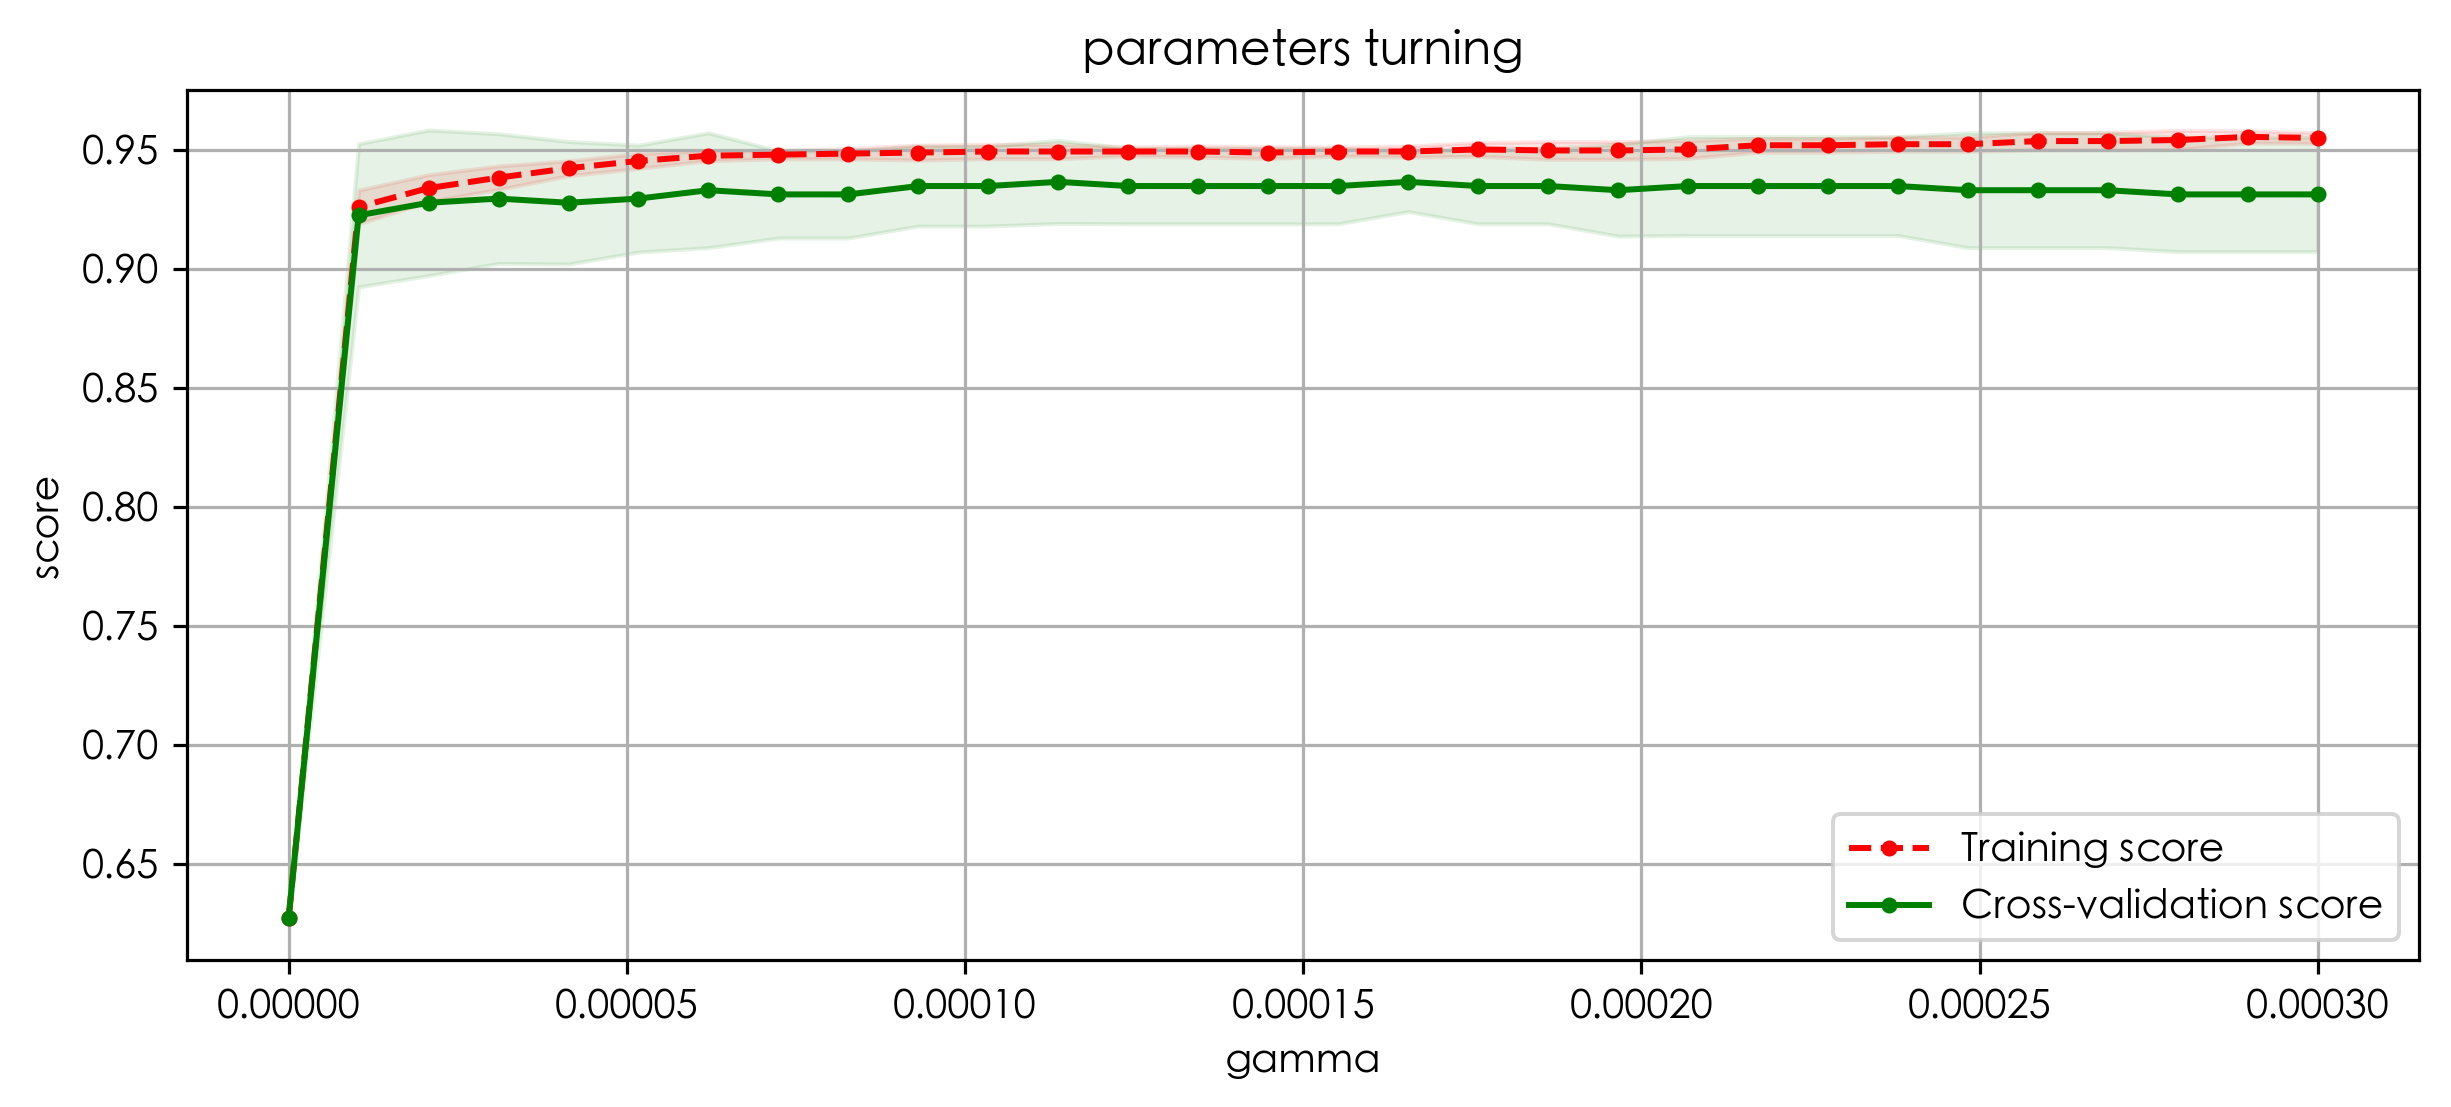

In [24]:
from common.utils import plot_param_curve
from sklearn.model_selection import GridSearchCV

gammas = np.linspace(0, 0.0003, 30)

param_grid = {'gamma': gammas}
# 5 折交叉验证
clf = GridSearchCV(SVC(kernel='rbf'), param_grid, cv=5, return_train_score=True)
clf.fit(X, y)

print("best param: {0}\nbest score: {1}".format(clf.best_params_, clf.best_score_))

plt.figure(figsize=(10, 4), dpi=144)
plot_param_curve(plt, gammas, clf.cv_results_, xlabel='gamma');

elaspe: 0.330630


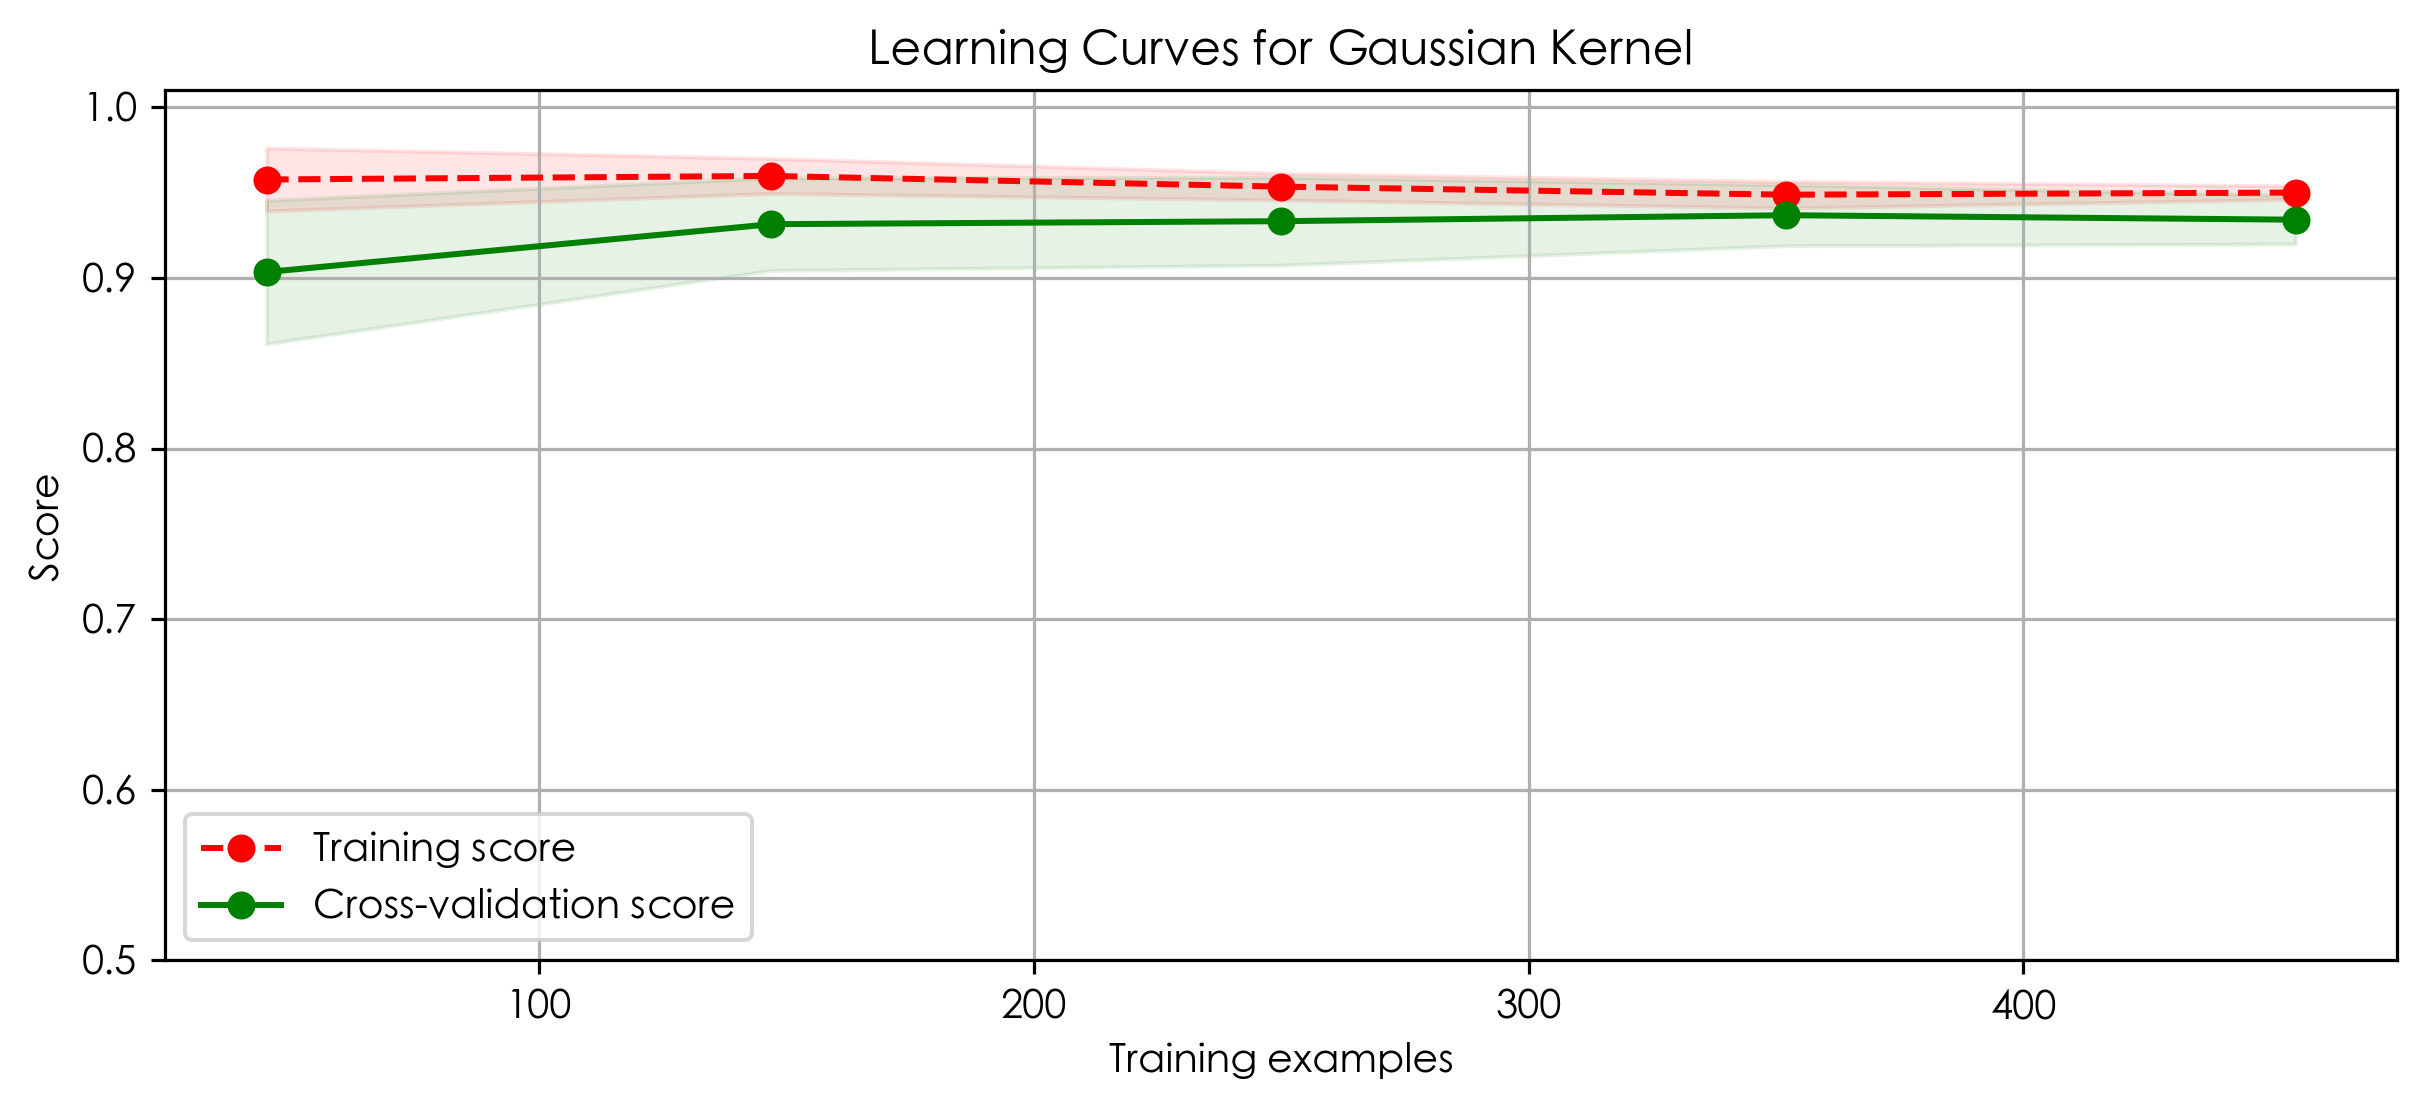

In [25]:
import time
from common.utils import plot_learning_curve
from sklearn.model_selection import ShuffleSplit

cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
title = 'Learning Curves for Gaussian Kernel'

start = time.clock()
plt.figure(figsize=(10, 4), dpi=144)
plot_learning_curve(plt, SVC(C=1.0, kernel='rbf', gamma=0.00011379310344827585),
                    title, X, y, ylim=(0.5, 1.01), cv=cv)

print('elaspe: {0:.6f}'.format(time.clock() - start))

In [27]:
cv

ShuffleSplit(n_splits=10, random_state=0, test_size=0.2, train_size=None)

elaspe: 0.610807


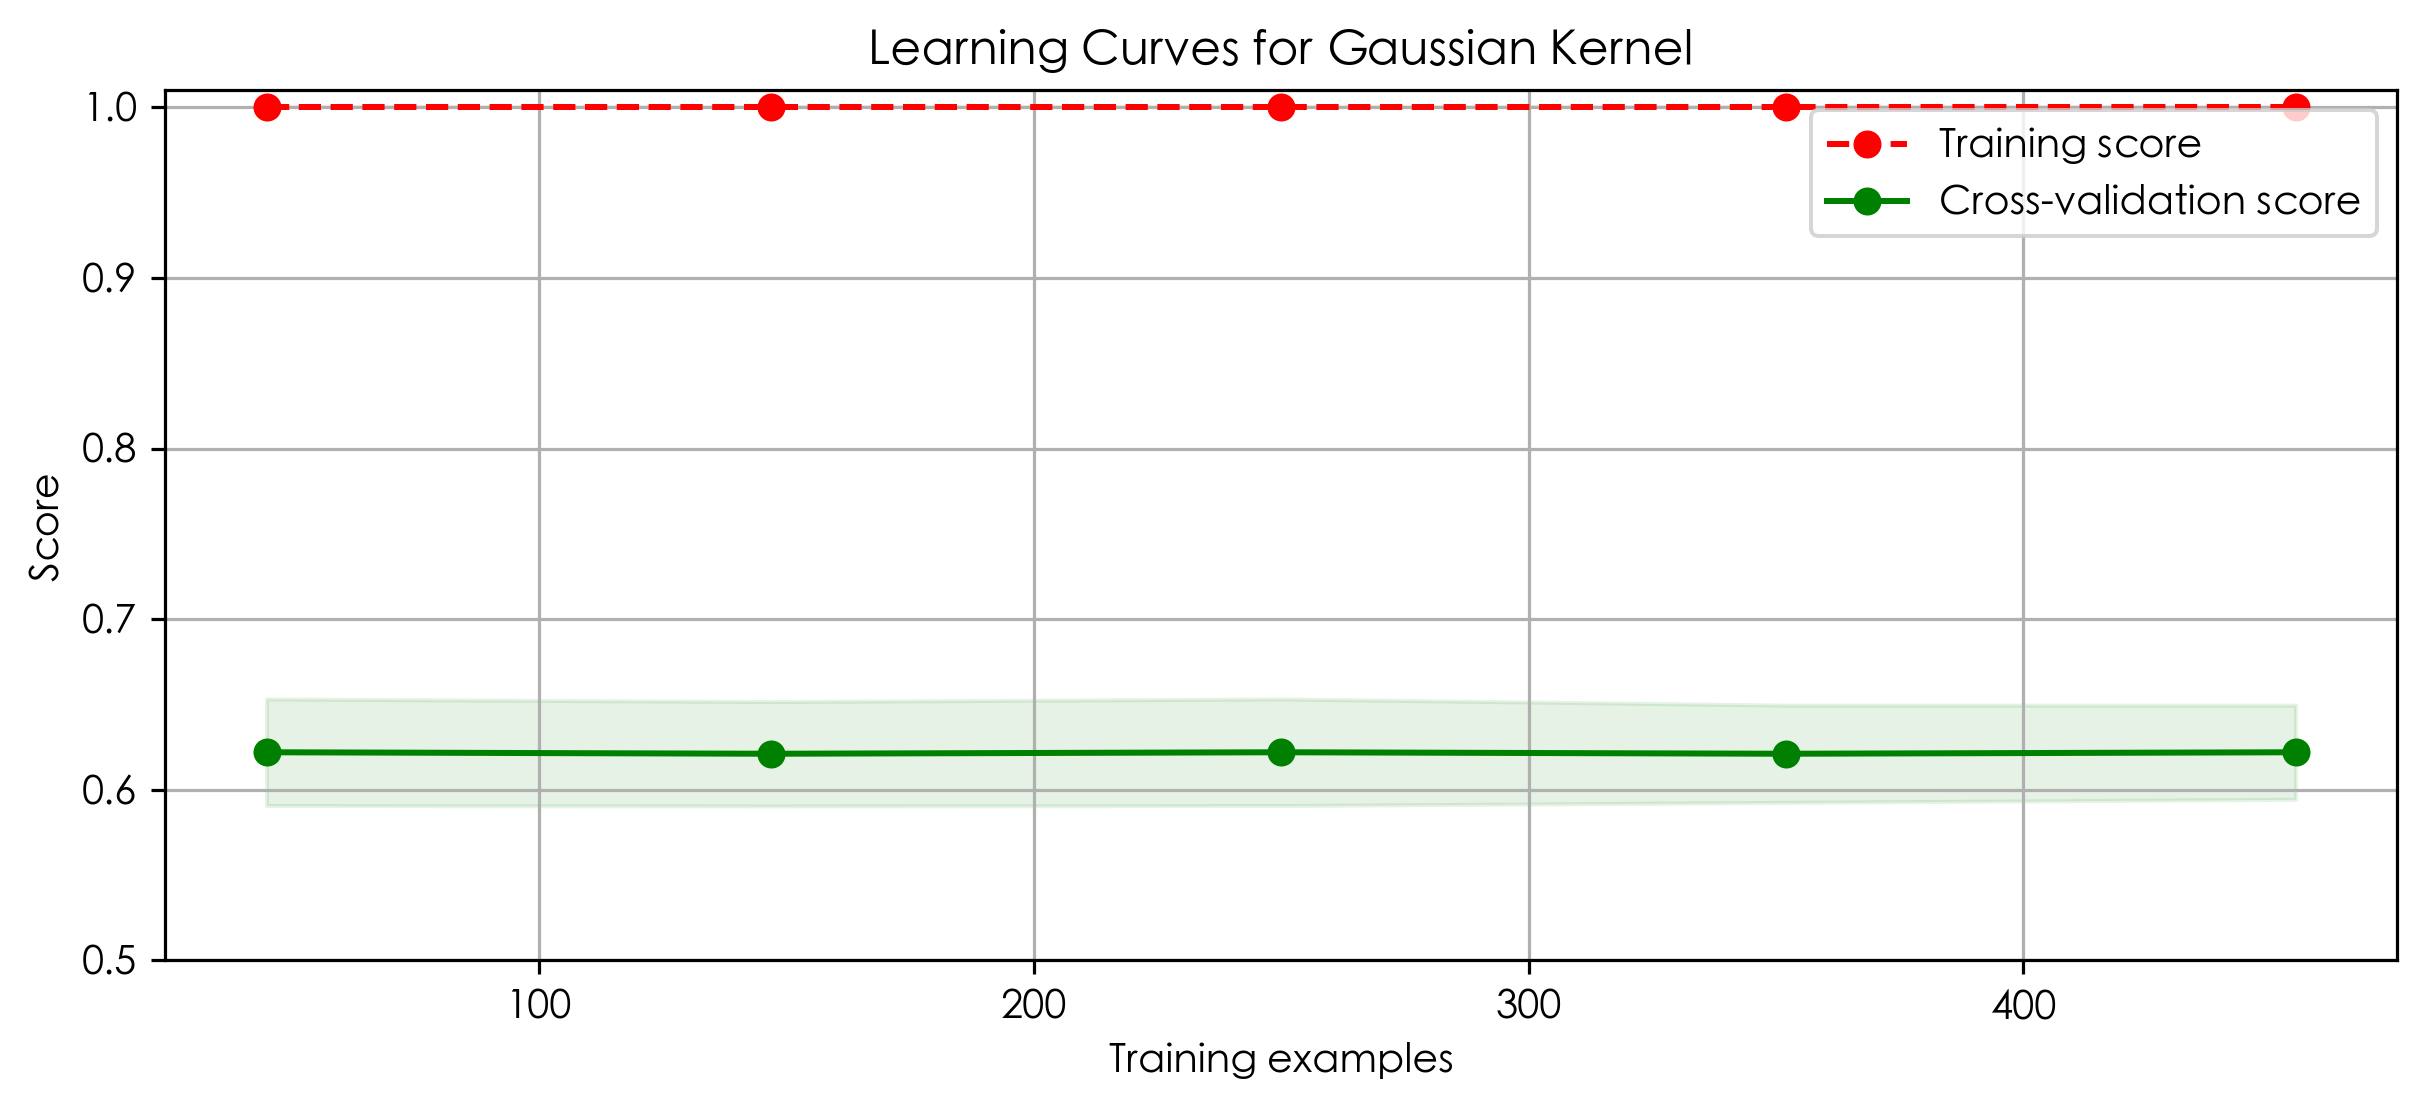

In [26]:
import time
from common.utils import plot_learning_curve
from sklearn.model_selection import ShuffleSplit

cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
title = 'Learning Curves for Gaussian Kernel'

start = time.clock()
plt.figure(figsize=(10, 4), dpi=144)
plot_learning_curve(plt, SVC(C=1.0, kernel='rbf', gamma=0.01),
                    title, X, y, ylim=(0.5, 1.01), cv=cv)

print('elaspe: {0:.6f}'.format(time.clock()-start))
# 从图中可以看出明显过拟合了

## 多项式核函数

使用二阶多项式作为核函数，效果还不错。

In [6]:
from sklearn.svm import SVC

clf = SVC(C=1.0, kernel='poly', degree=2)
clf.fit(X_train, y_train)
train_score = clf.score(X_train, y_train)
test_score = clf.score(X_test, y_test)
print('train score: {0}; test score: {1}'.format(train_score, test_score))

train score: 0.978021978022; test score: 0.947368421053


elaspe: 0.580854


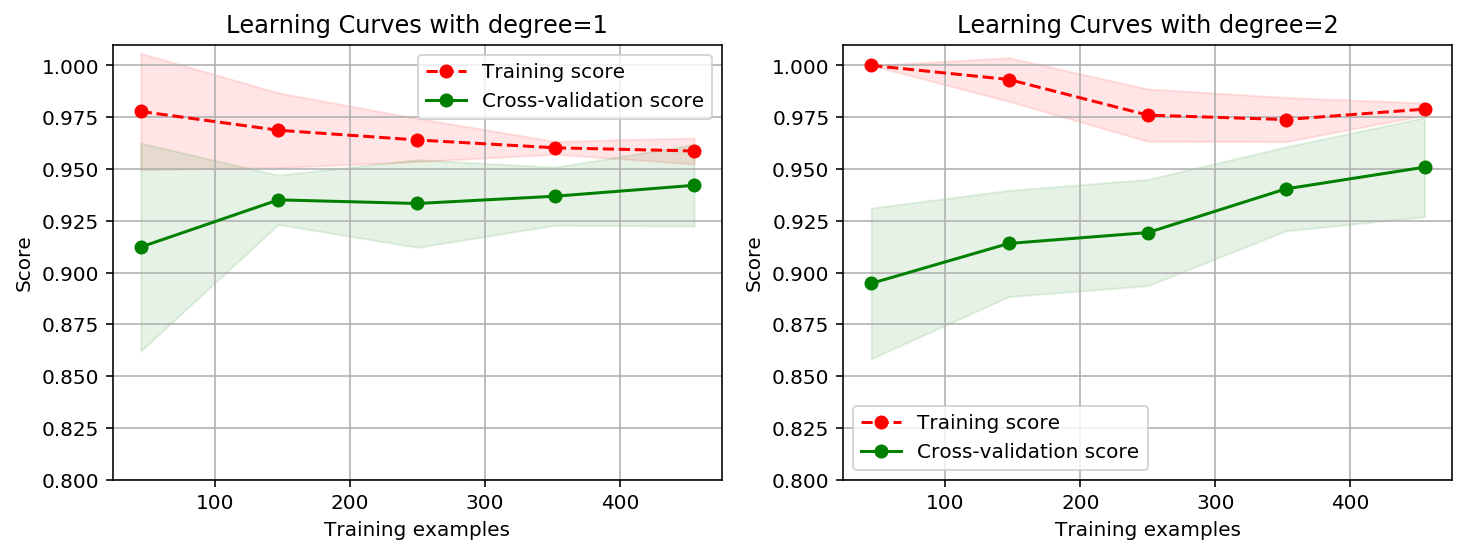

In [10]:
import time
from common.utils import plot_learning_curve
from sklearn.model_selection import ShuffleSplit

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
title = 'Learning Curves with degree={0}'
degrees = [1, 2]

start = time.clock()
plt.figure(figsize=(12, 4), dpi=144)
for i in range(len(degrees)):
    plt.subplot(1, len(degrees), i + 1)
    plot_learning_curve(plt, SVC(C=1.0, kernel='poly', degree=degrees[i]), title.format(degrees[i]), X, y, ylim=(0.8, 1.01), cv=cv, n_jobs=4)

print('elaspe: {0:.6f}'.format(time.clock()-start))

## 多项式 LinearSVC

In [4]:
from sklearn.svm import LinearSVC
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

def create_model(degree=2, **kwarg):
    polynomial_features = PolynomialFeatures(degree=degree,
                                             include_bias=False)
    scaler = MinMaxScaler()
    linear_svc = LinearSVC(**kwarg)
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("scaler", scaler),
                         ("linear_svc", linear_svc)])
    return pipeline


clf = create_model(penalty='l1', dual=False)
clf.fit(X_train, y_train)
train_score = clf.score(X_train, y_train)
test_score = clf.score(X_test, y_test)
print('train score: {0}; test score: {1}'.format(train_score, test_score))

train score: 0.984615384615; test score: 0.991228070175


elaspe: 1.650748


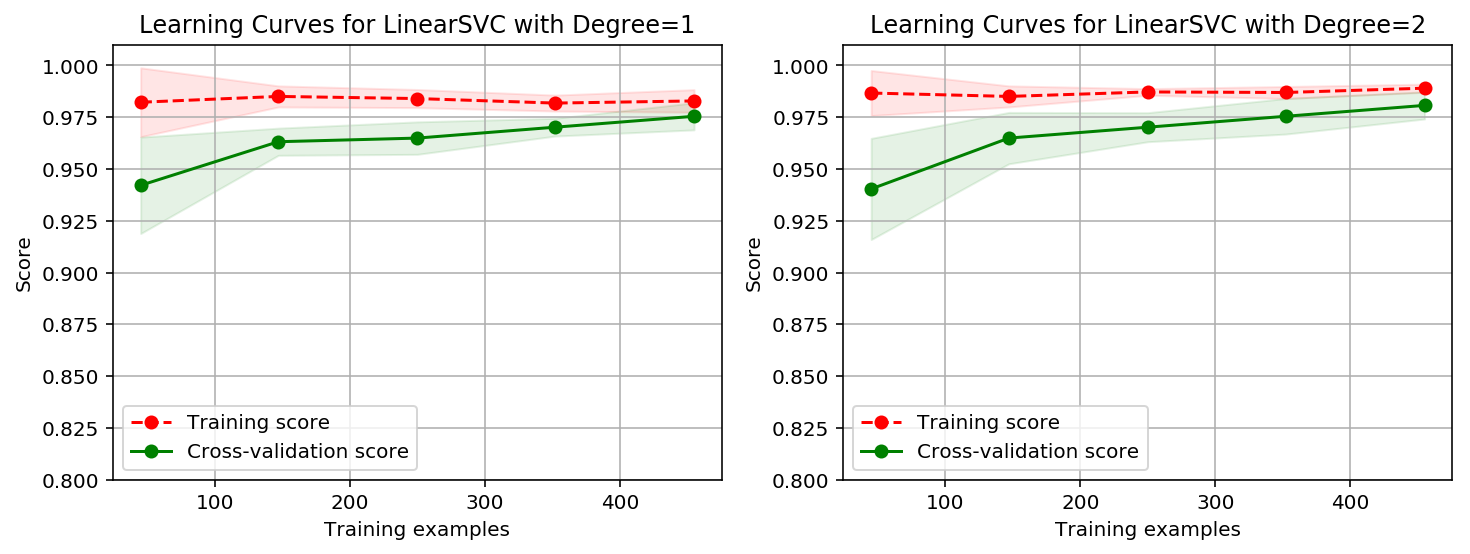

In [5]:
import time
from common.utils import plot_learning_curve
from sklearn.model_selection import ShuffleSplit

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
title = 'Learning Curves for LinearSVC with Degree={0}'
degrees = [1, 2]

start = time.clock()
plt.figure(figsize=(12, 4), dpi=144)
for i in range(len(degrees)):
    plt.subplot(1, len(degrees), i + 1)
    plot_learning_curve(plt, create_model(penalty='l1', dual=False, degree=degrees[i]),
                        title.format(degrees[i]), X, y, ylim=(0.8, 1.01), cv=cv)

print('elaspe: {0:.6f}'.format(time.clock()-start))